In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
prst = pd.read_csv("prst.csv")
prst.head()

,Unnamed: 0,Adaptable,BestValue,CuttingEdge,Delightful,Exciting,Friendly,Generous,Helpful,Intuitive,Brand
0,1,6,5,4,4,3,4,5,4,3,Sierra
1,2,4,3,4,2,4,4,5,2,5,Romeo
2,3,3,2,3,6,5,5,6,4,3,Sierra
3,4,4,1,4,4,5,4,5,3,3,Sierra
4,5,4,1,3,3,3,5,5,4,4,Sierra


In [6]:
from sklearn.preprocessing import StandardScaler

prst_sc = pd.DataFrame(StandardScaler().fit_transform(prst.iloc[:,:-1]))
prst_sc.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.731483,1.790983,1.104656,-0.066166,0.017723,-0.888286,-0.243535,1.022783,0.098305,-0.752006
1,-1.730347,-0.262202,-0.814023,-0.066166,-2.022098,0.107038,-0.243535,1.022783,-1.752491,1.324606
2,-1.729211,-1.288794,-1.773363,-1.004800,2.057544,1.102362,0.746840,2.078805,0.098305,-0.752006
3,-1.728076,-0.262202,-2.732703,-0.066166,0.017723,1.102362,-0.243535,1.022783,-0.827093,-0.752006
4,-1.726940,-0.262202,-2.732703,-1.004800,-1.002188,-0.888286,0.746840,1.022783,0.098305,0.286300


In [9]:
prst_sc = prst_sc.assign(Brand = prst["Brand"])

In [11]:
prst_mean = prst_sc.groupby('Brand').mean().reset_index()
prst_mean = prst_mean.set_index(prst_mean.columns[0])
prst_mean

,0,1,2,3,4,5,6,7,8,9
Brand,,,,,,,,,,
Papa,-0.124877,0.148435,-0.133958,-0.560513,-0.462768,-0.507851,0.436522,-0.284337,0.435561,0.475503
Romeo,0.002986,0.049973,-0.032006,-0.148516,-0.052646,-0.126956,0.126801,-0.087209,0.088057,0.157175
Sierra,0.014167,-0.085140,0.023577,0.220709,0.128008,0.190649,-0.192202,0.112094,-0.161369,-0.206408
Tango,0.119990,-0.098348,0.232813,0.585068,0.413063,0.534995,-0.424189,0.341701,-0.387002,-0.545698


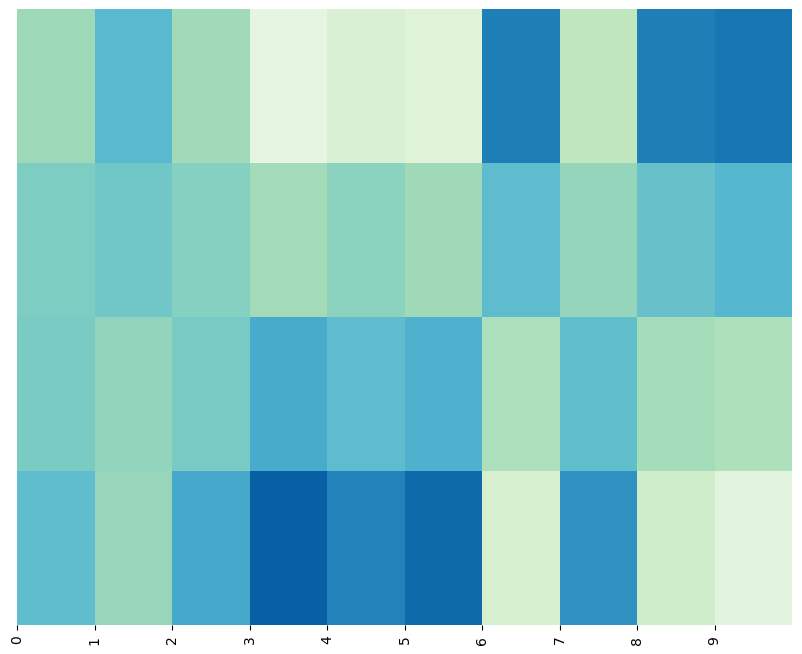

In [12]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Assuming your DataFrame with mean values is named 'prst_mean'
prst_mean_matrix = prst_mean.to_numpy()

# Create a custom colormap using ColorBrewer's GnBu palette
cmap = LinearSegmentedColormap.from_list("GnBu", sns.color_palette("GnBu", 9))

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(prst_mean_matrix, cmap=cmap, annot=False, xticklabels=prst_mean.columns, yticklabels=prst_mean.index, cbar=False, ax=ax)

# Remove the dendrogram and the color legend
ax.set_yticks([])
ax.set_xticks(range(len(prst_mean.columns)))
ax.set_xticklabels(prst_mean.columns, rotation=90)

plt.show()

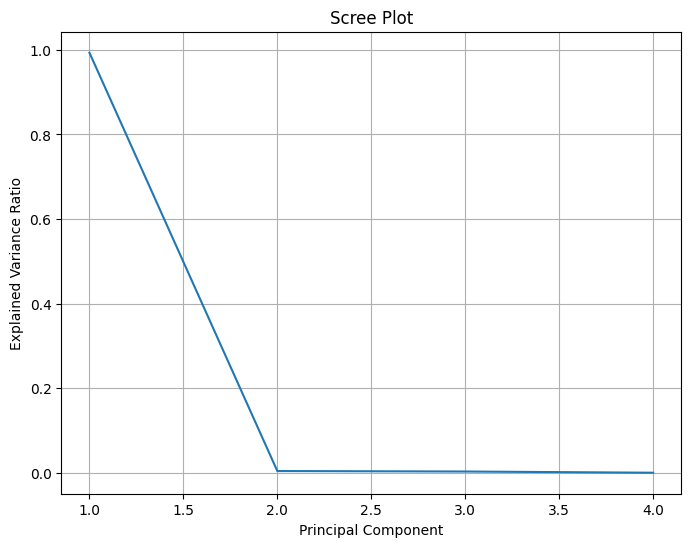

In [14]:
from sklearn.decomposition import PCA

# Assuming your DataFrame with mean values is named 'prst_mean'
prst_pca = PCA()
prst_pca.fit(prst_mean.iloc[:, :-1].to_numpy())

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(prst_pca.explained_variance_ratio_) + 1), prst_pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

ValueError: Argument U has a size 9 which does not match 1, the number of arrow positions

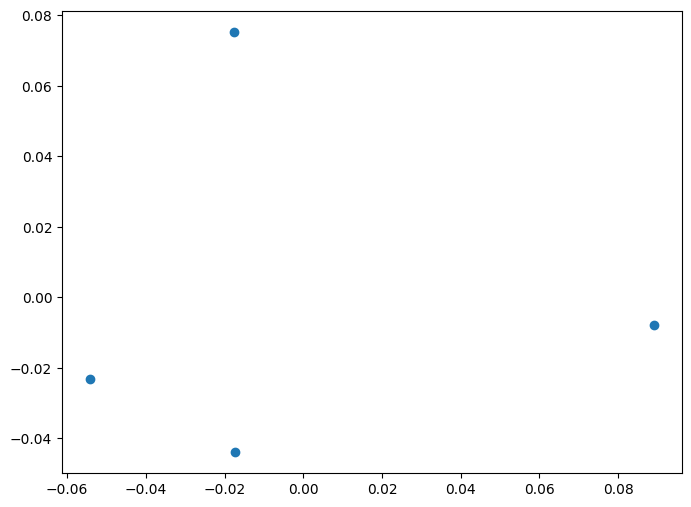

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(prst_pca.transform(prst_mean.iloc[:, :-1].to_numpy())[:, 1],
            prst_pca.transform(prst_mean.iloc[:, :-1].to_numpy())[:, 2])

# Add loadings as vectors
loading = prst_pca.components_.T[:, 1:3]
plt.quiver(0, 0, loading[:, 0], loading[:, 1], angles='xy', scale_units='xy', scale=1, color='r')

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('Biplot of Principal Components 2 and 3')
plt.grid()
plt.show()